<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/fcc_MAGIC_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'] = (df['class'] == 'g').astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

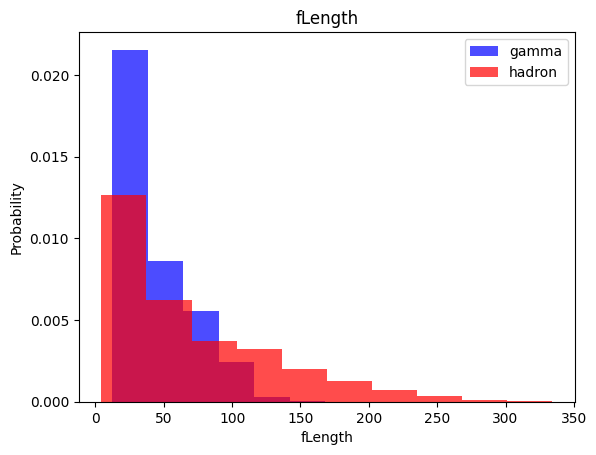

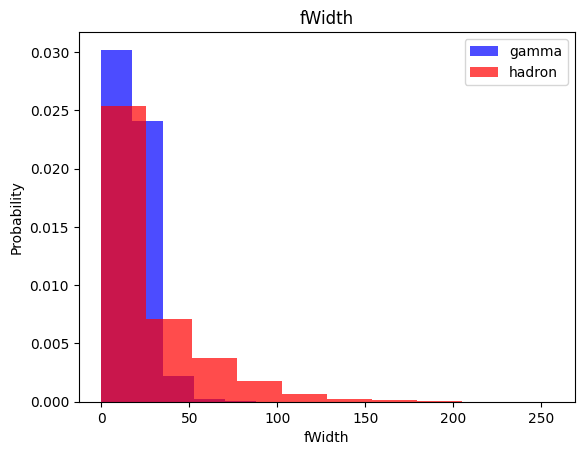

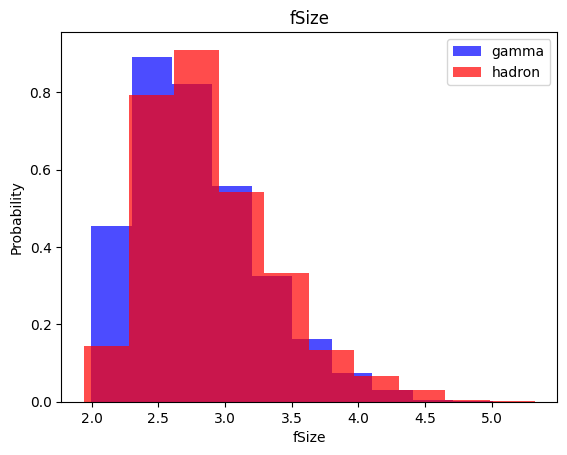

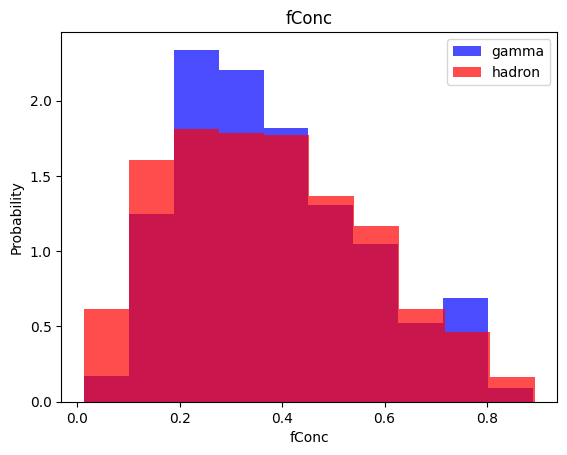

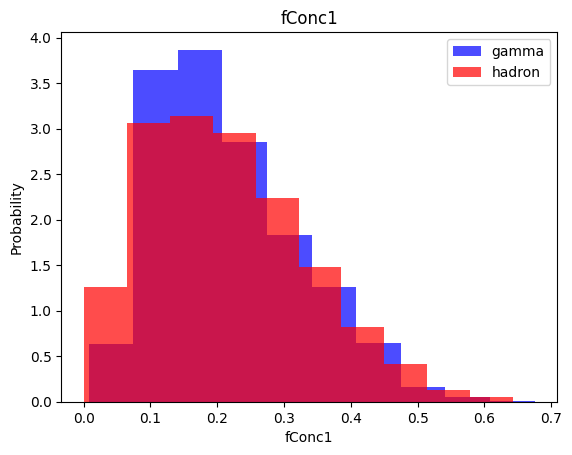

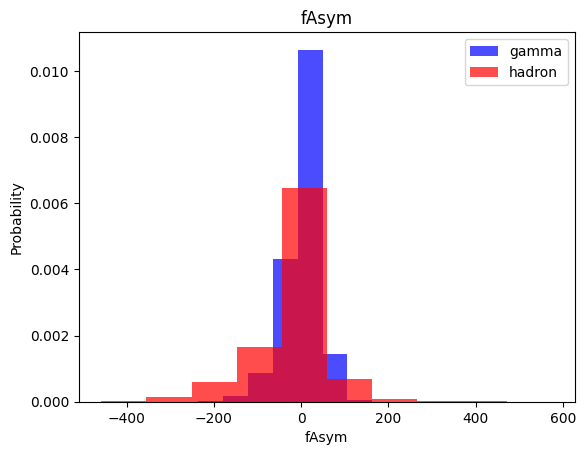

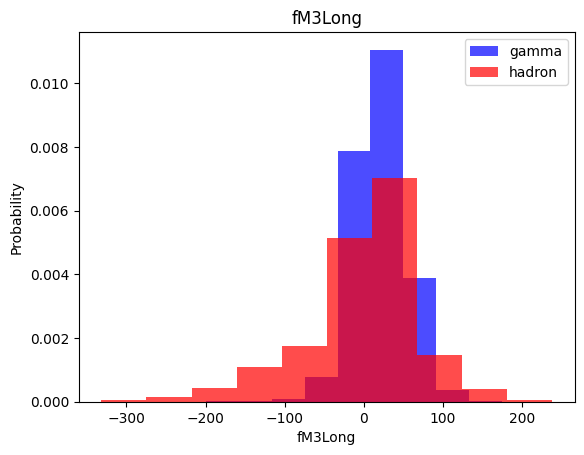

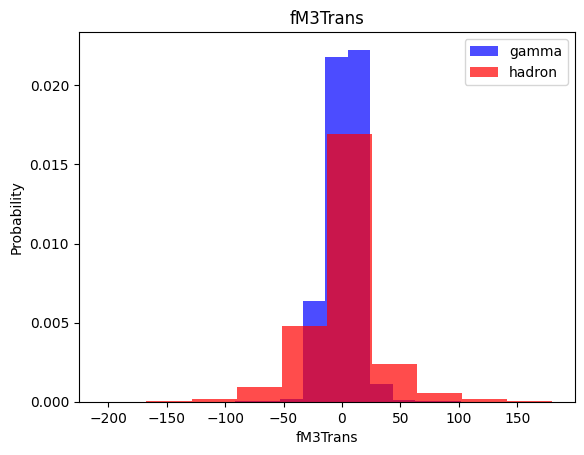

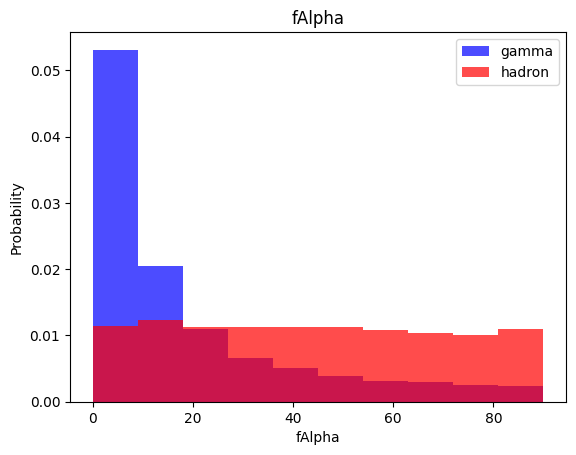

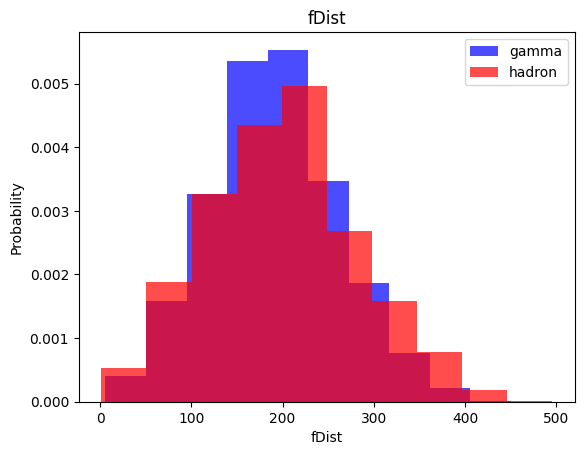

In [4]:
for column in cols[:-1]:
  plt.hist(df[df['class']==1][column], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][column], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [5]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

# Training, Validation and Test Datasets

In [6]:
train, test, valid = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*(len(df)))])

In [7]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1329
           1       0.74      0.90      0.81      2475

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



#SVM Model

In [11]:
from sklearn.svm import SVC

In [12]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [13]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1329
           1       0.89      0.90      0.89      2475

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [14]:
import tensorflow as tf

In [26]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [28]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid), verbose=0)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


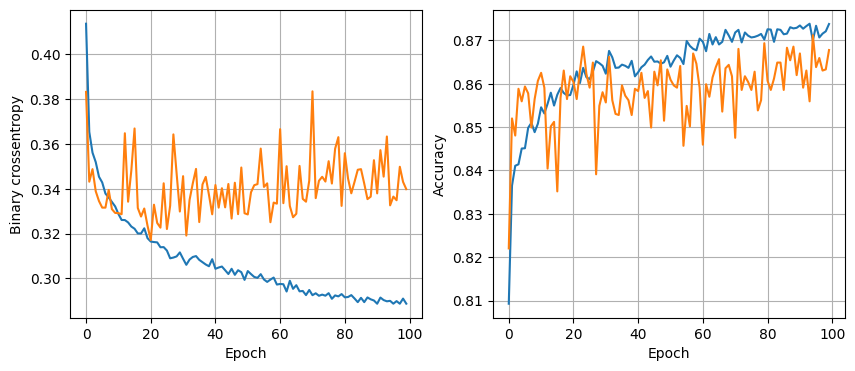

119/119 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.01, batch_size 64


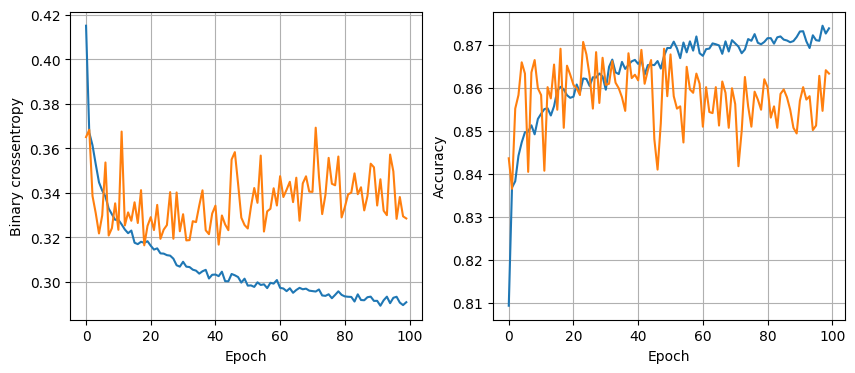

119/119 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.01, batch_size 128


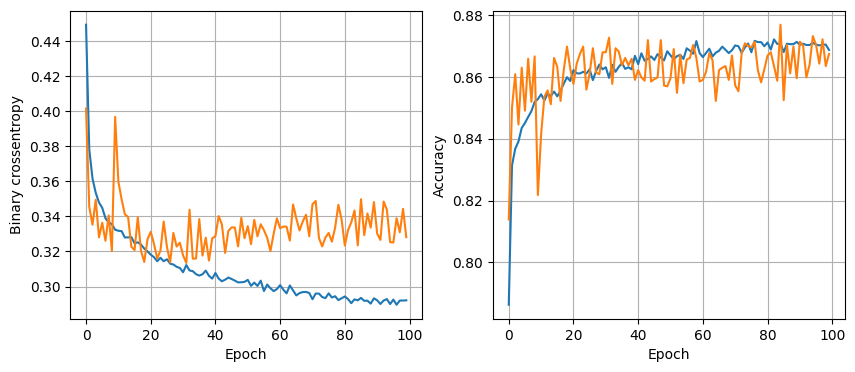

119/119 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.005, batch_size 32


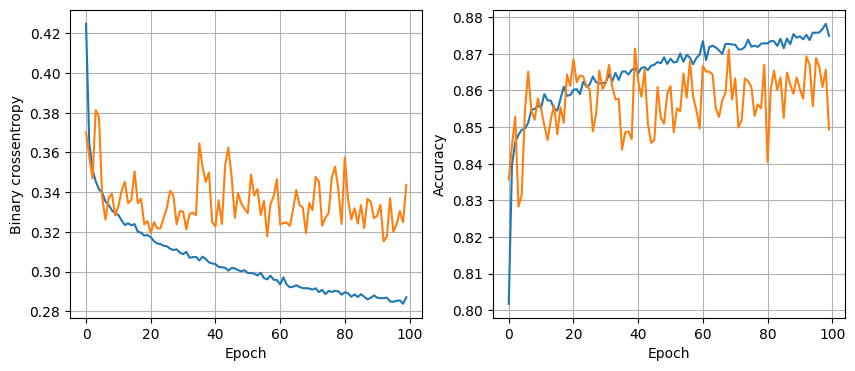

119/119 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8494
16 nodes, dropout 0, lr 0.005, batch_size 64


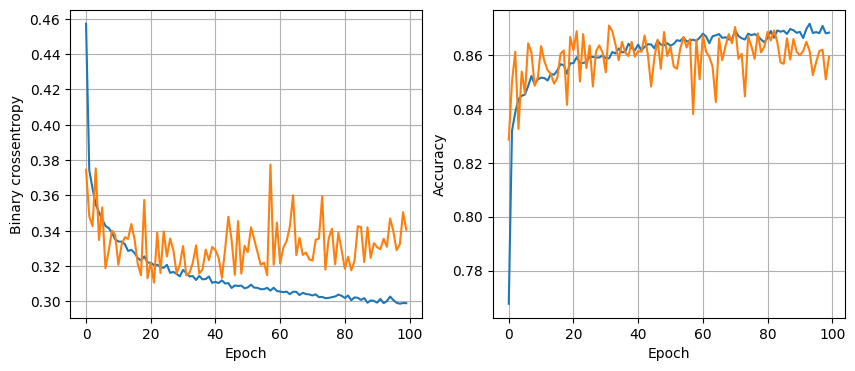

119/119 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8594
16 nodes, dropout 0, lr 0.005, batch_size 128


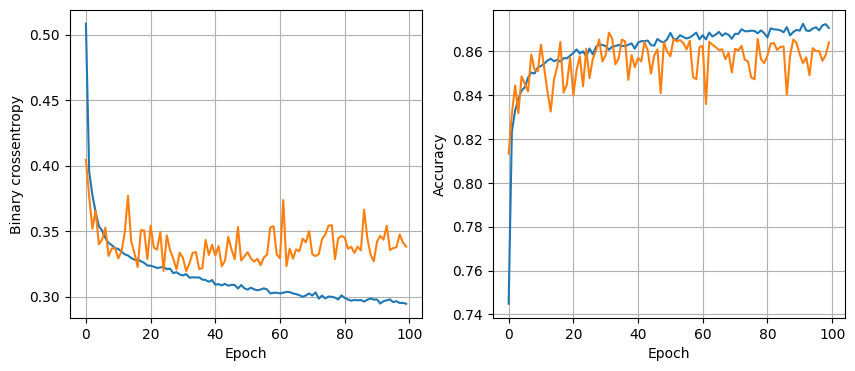

119/119 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8641
16 nodes, dropout 0, lr 0.001, batch_size 32


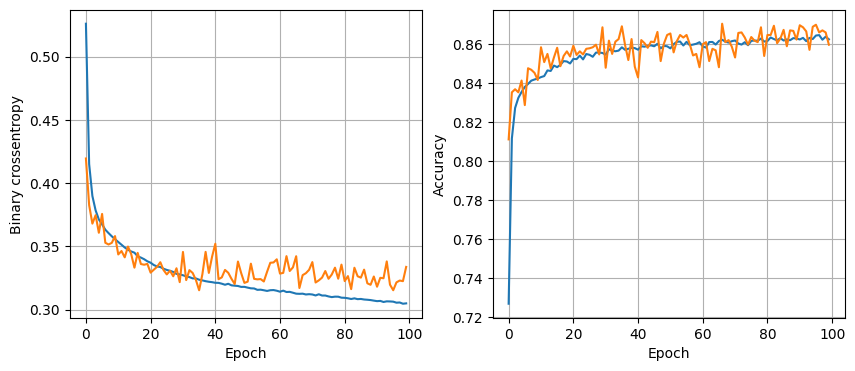

119/119 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8599
16 nodes, dropout 0, lr 0.001, batch_size 64


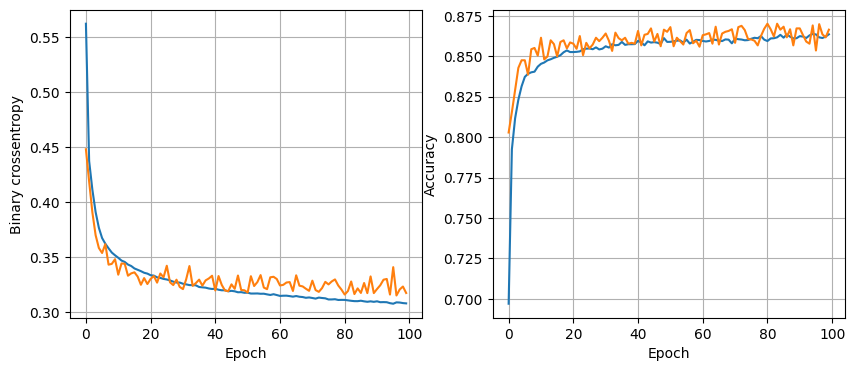

119/119 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.001, batch_size 128


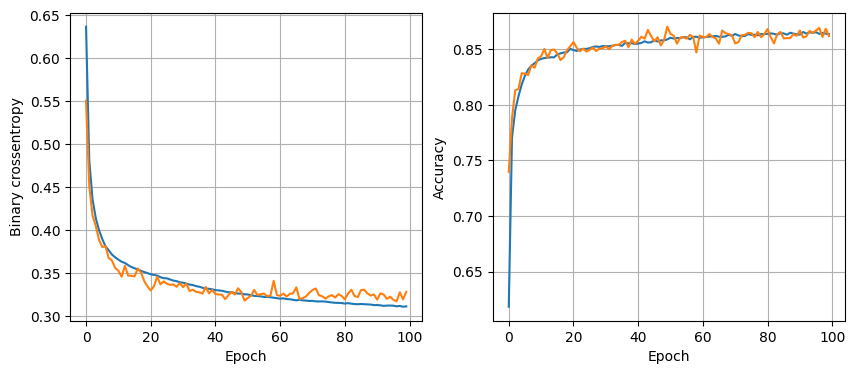

119/119 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8617
16 nodes, dropout 0.2, lr 0.01, batch_size 32


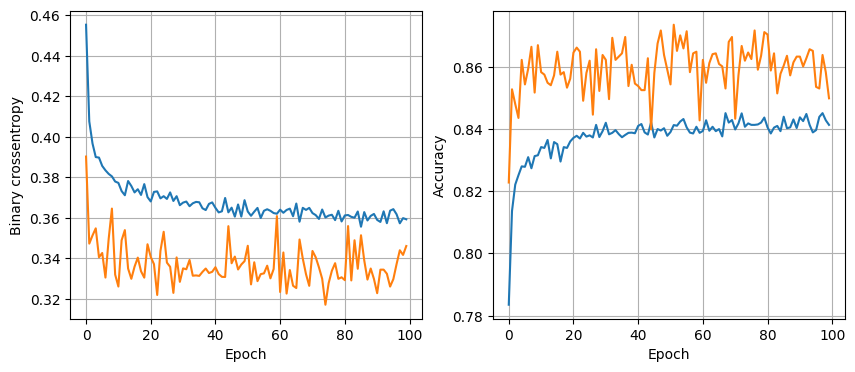

119/119 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8499
16 nodes, dropout 0.2, lr 0.01, batch_size 64


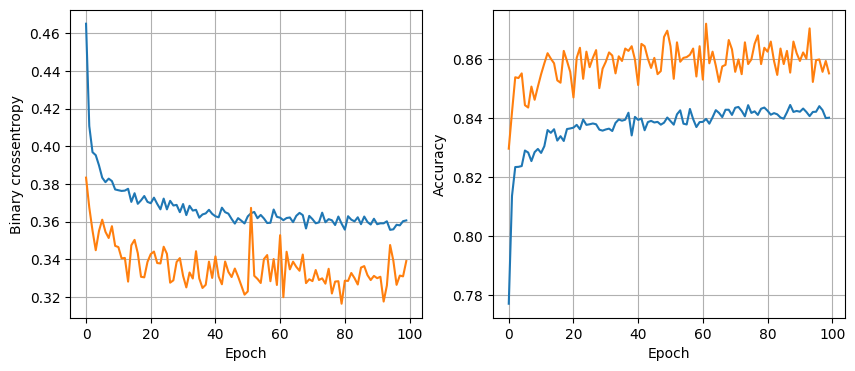

119/119 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8552
16 nodes, dropout 0.2, lr 0.01, batch_size 128


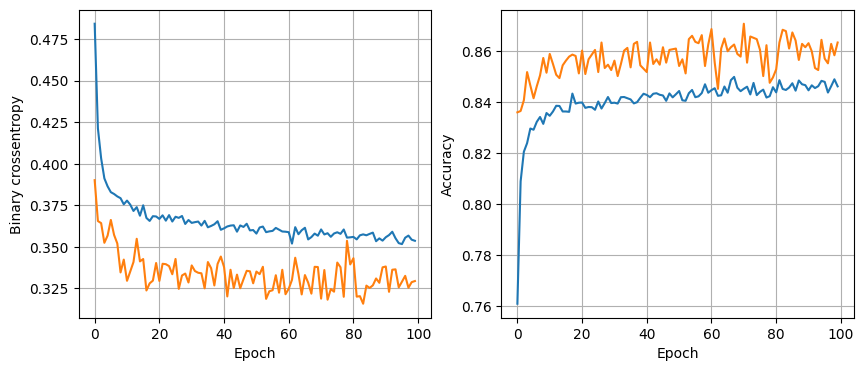

119/119 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.005, batch_size 32


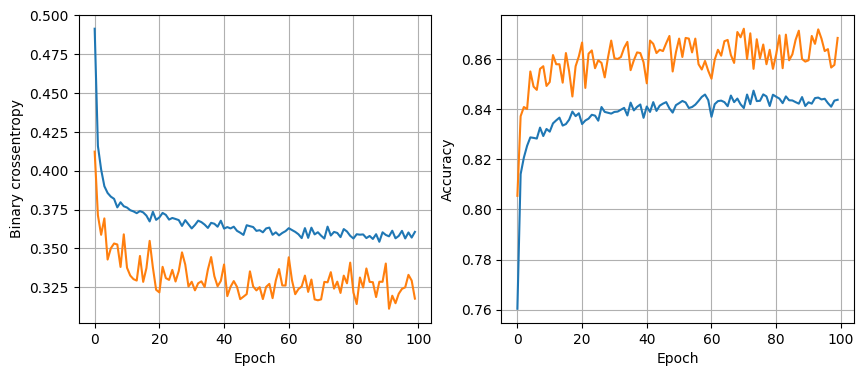

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch_size 64


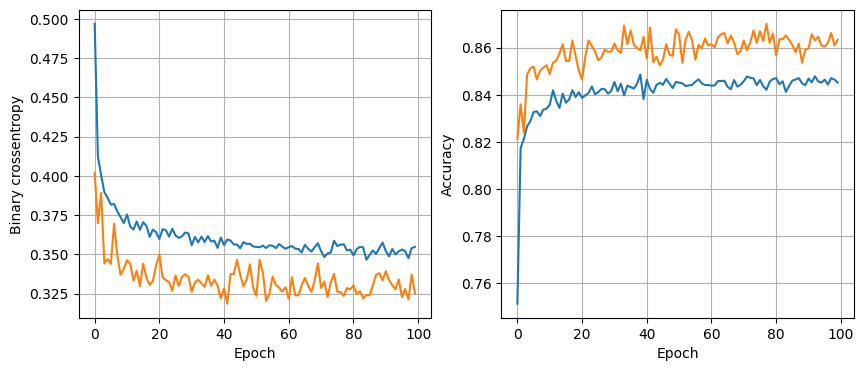

119/119 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.005, batch_size 128


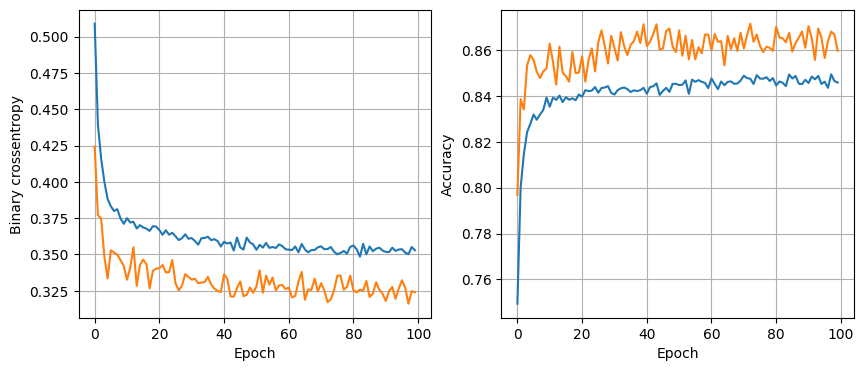

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8596
16 nodes, dropout 0.2, lr 0.001, batch_size 32


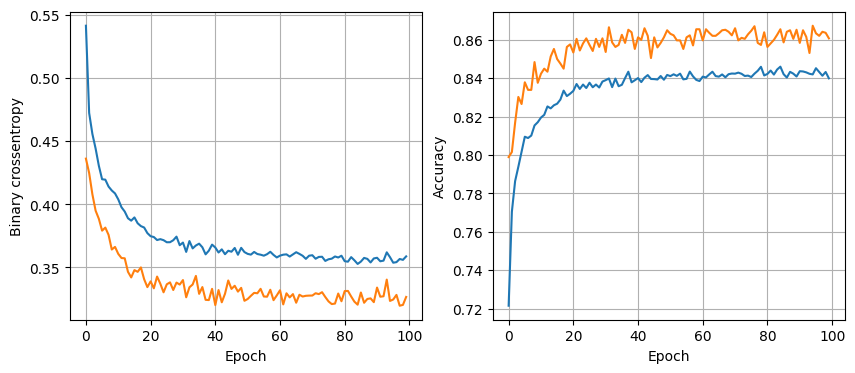

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8607
16 nodes, dropout 0.2, lr 0.001, batch_size 64


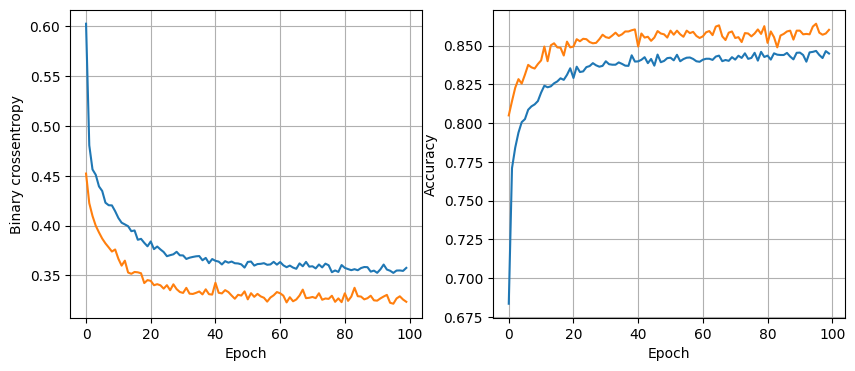

119/119 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.001, batch_size 128


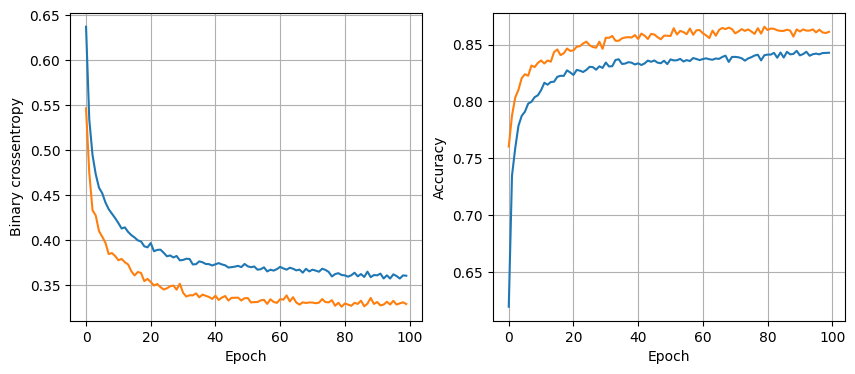

119/119 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8612
32 nodes, dropout 0, lr 0.01, batch_size 32


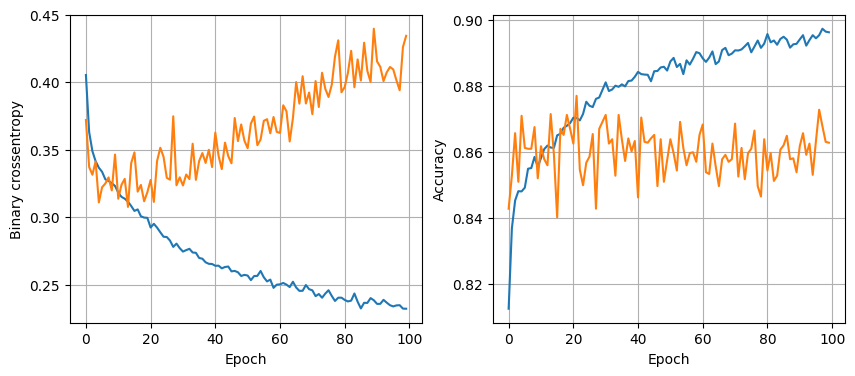

119/119 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8628
32 nodes, dropout 0, lr 0.01, batch_size 64


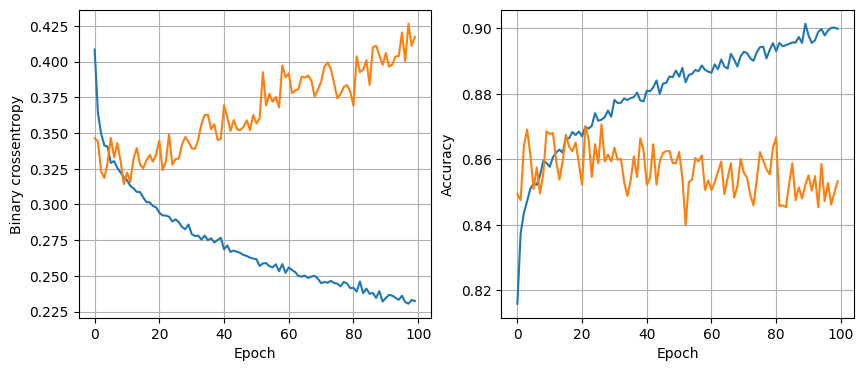

119/119 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8533
32 nodes, dropout 0, lr 0.01, batch_size 128


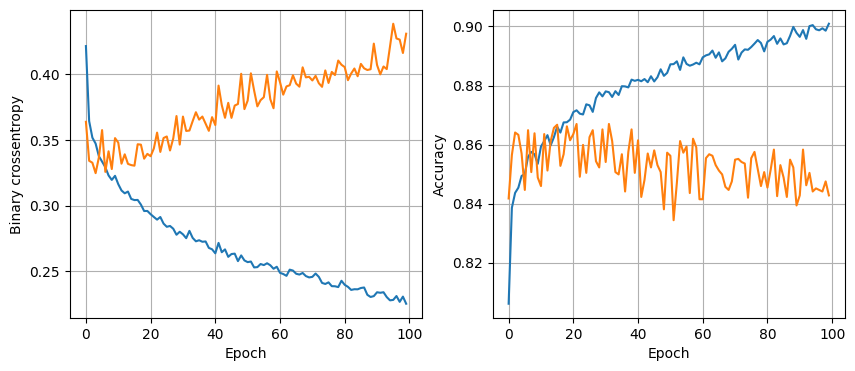

119/119 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8428
32 nodes, dropout 0, lr 0.005, batch_size 32


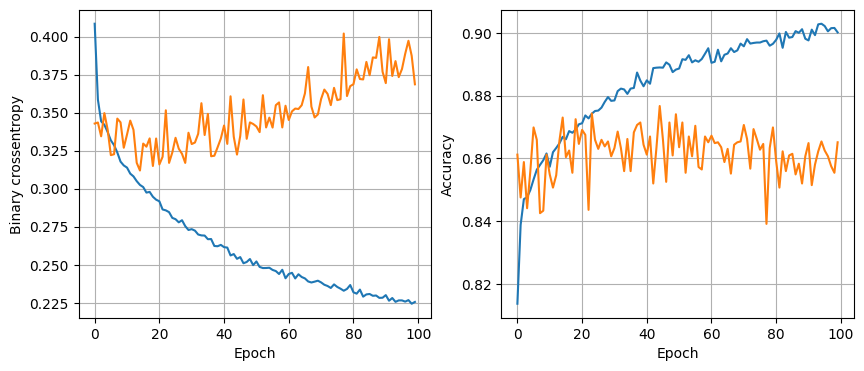

119/119 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.005, batch_size 64


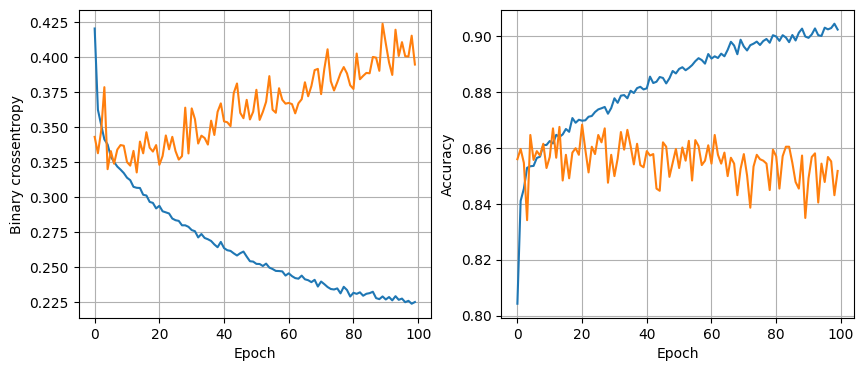

119/119 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8517
32 nodes, dropout 0, lr 0.005, batch_size 128


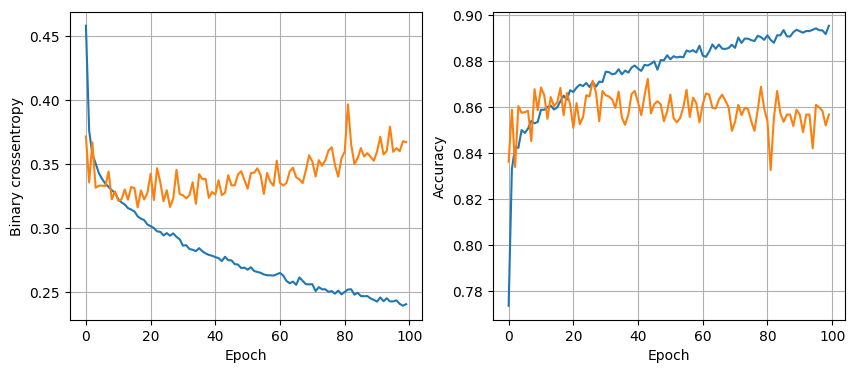

119/119 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.001, batch_size 32


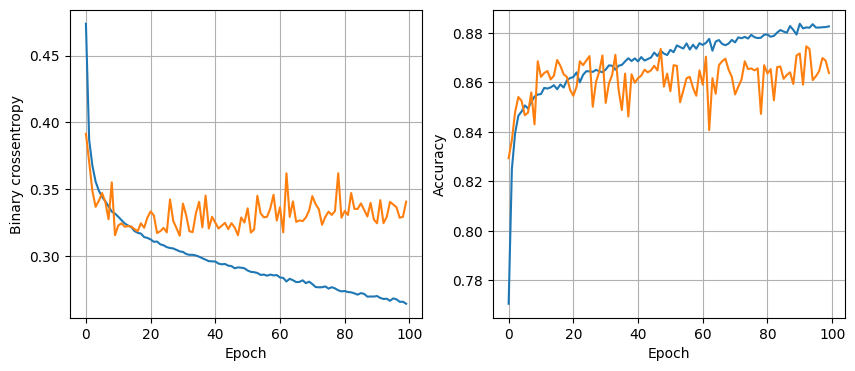

119/119 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.001, batch_size 64


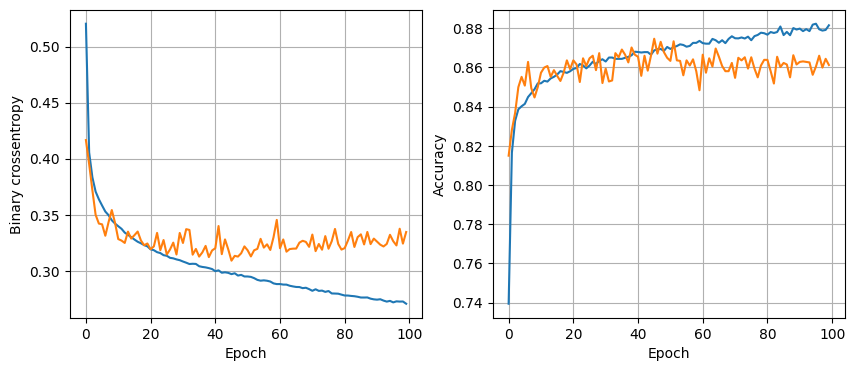

119/119 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8612
32 nodes, dropout 0, lr 0.001, batch_size 128


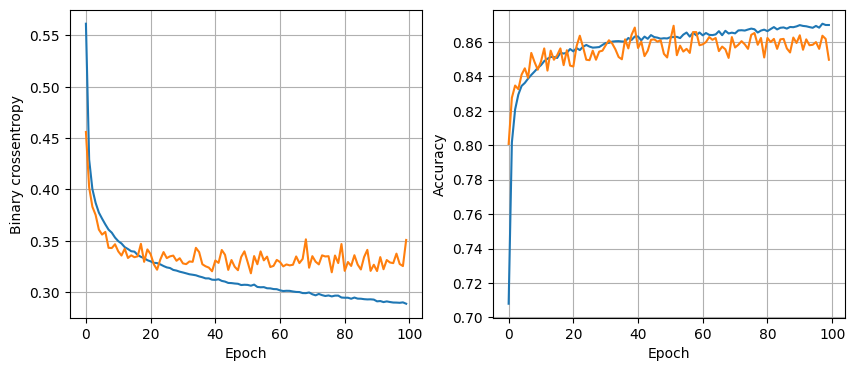

119/119 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8496
32 nodes, dropout 0.2, lr 0.01, batch_size 32


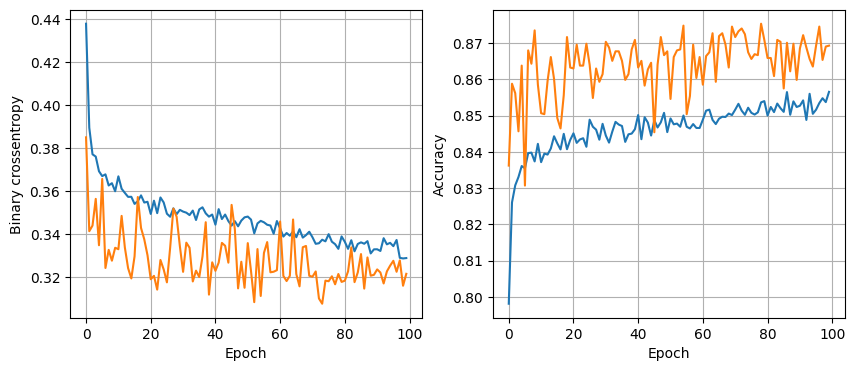

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8693
32 nodes, dropout 0.2, lr 0.01, batch_size 64


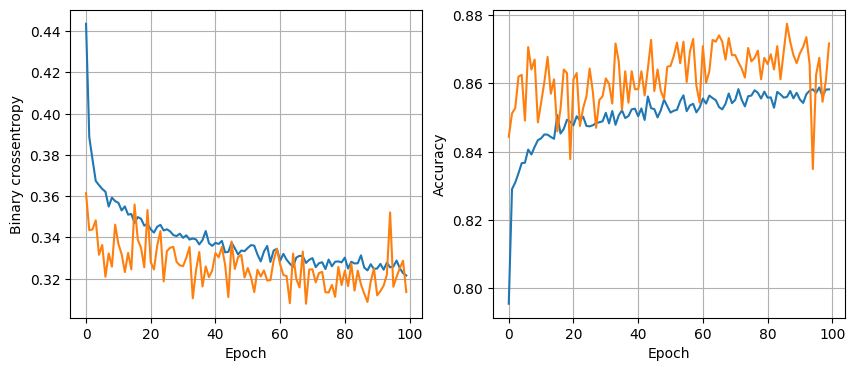

119/119 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.01, batch_size 128


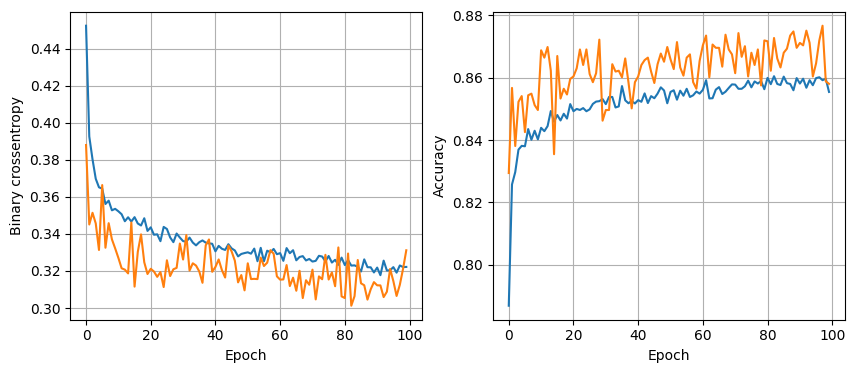

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8580
32 nodes, dropout 0.2, lr 0.005, batch_size 32


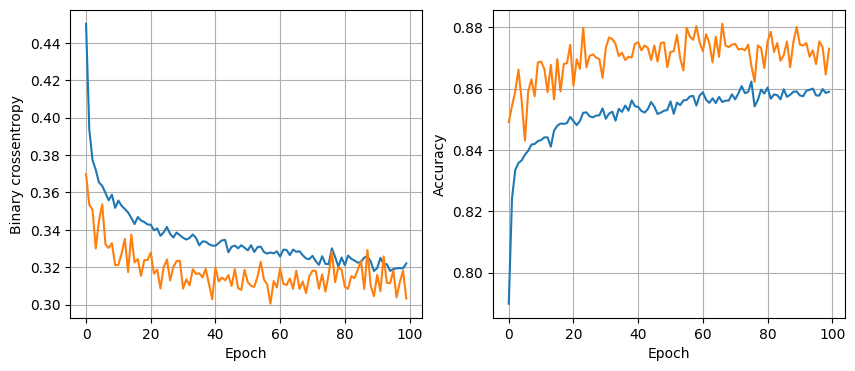

119/119 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.005, batch_size 64


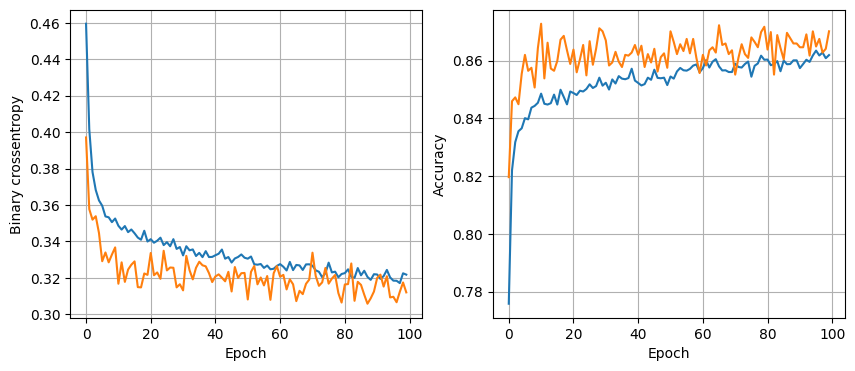

119/119 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.005, batch_size 128


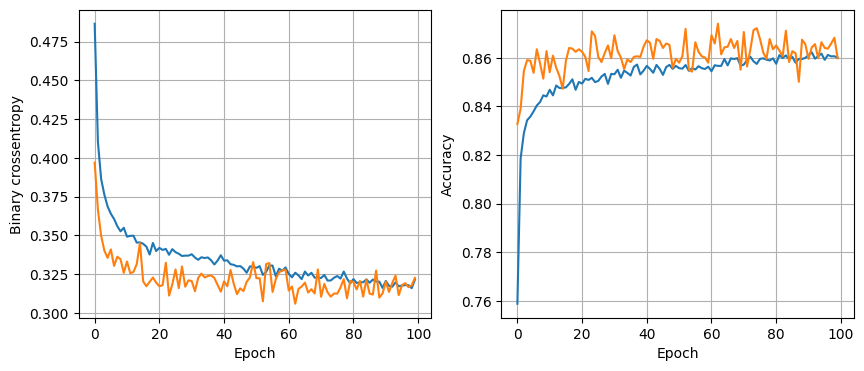

119/119 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8599
32 nodes, dropout 0.2, lr 0.001, batch_size 32


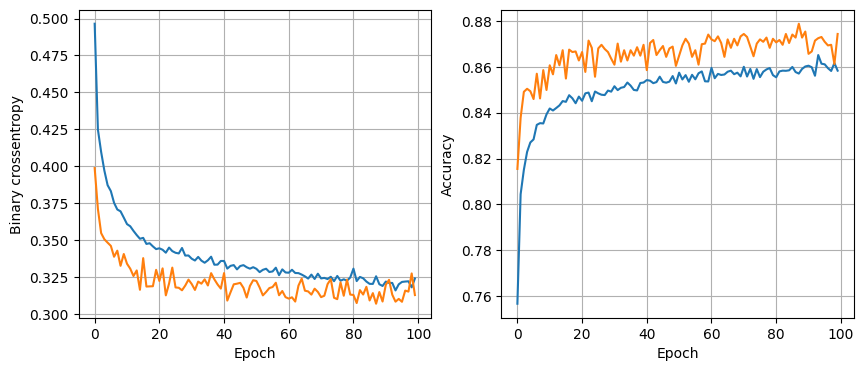

119/119 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch_size 64


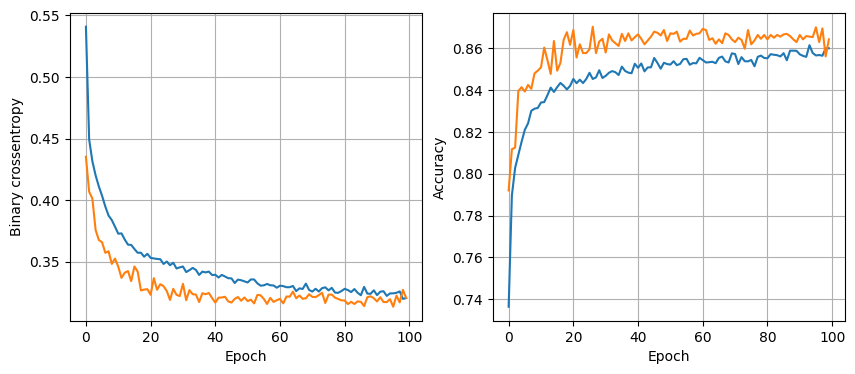

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8644
32 nodes, dropout 0.2, lr 0.001, batch_size 128


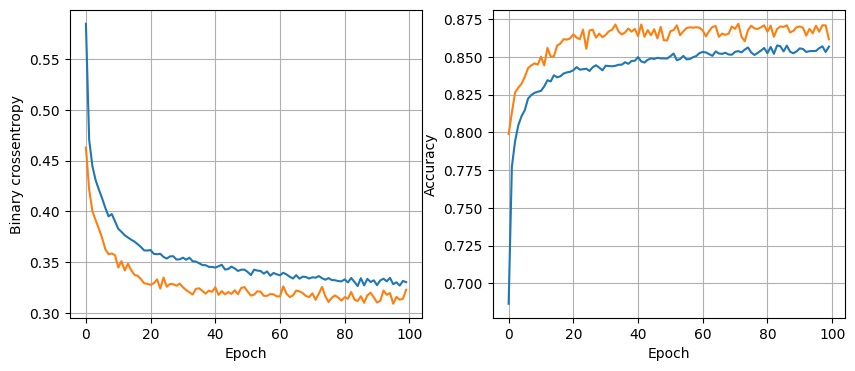

119/119 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8617
64 nodes, dropout 0, lr 0.01, batch_size 32


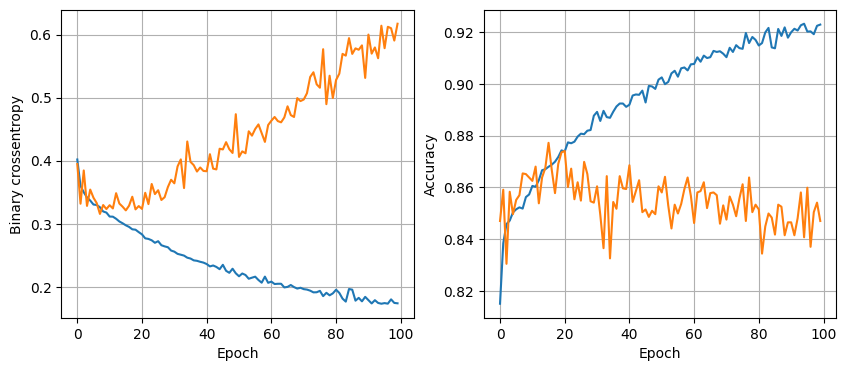

119/119 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.8470
64 nodes, dropout 0, lr 0.01, batch_size 64


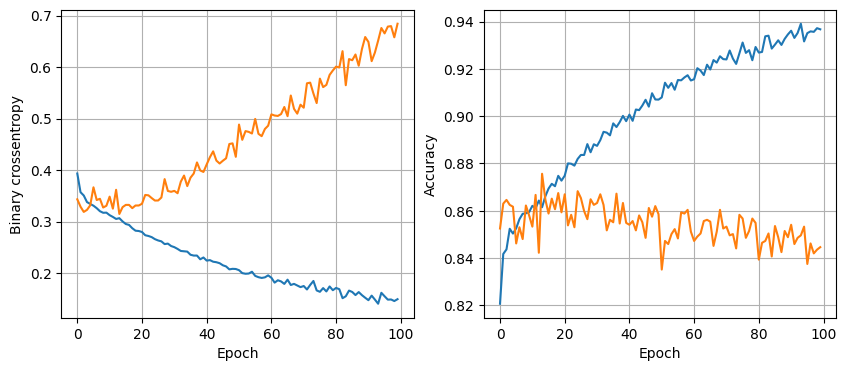

119/119 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.8446
64 nodes, dropout 0, lr 0.01, batch_size 128


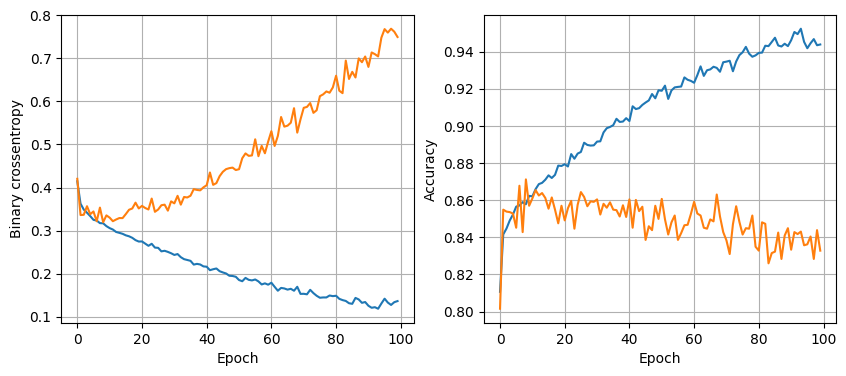

119/119 [==============================] - 0s 2ms/step - loss: 0.7498 - accuracy: 0.8328
64 nodes, dropout 0, lr 0.005, batch_size 32


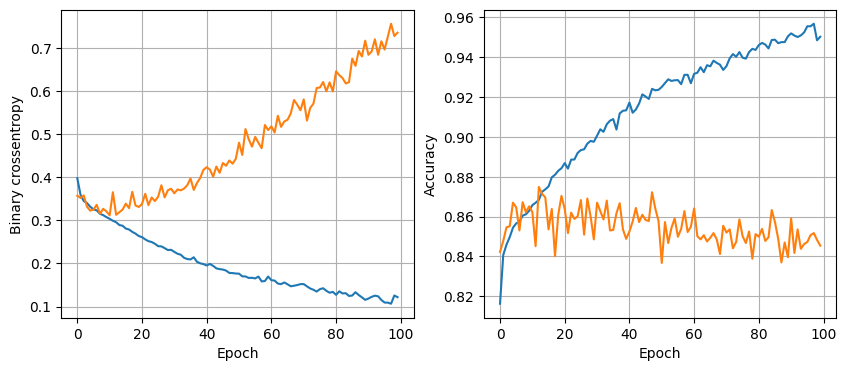

119/119 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.8454
64 nodes, dropout 0, lr 0.005, batch_size 64


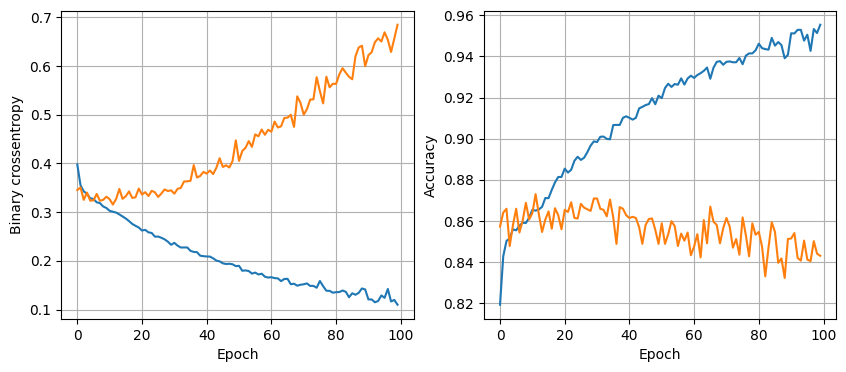

119/119 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.8431
64 nodes, dropout 0, lr 0.005, batch_size 128


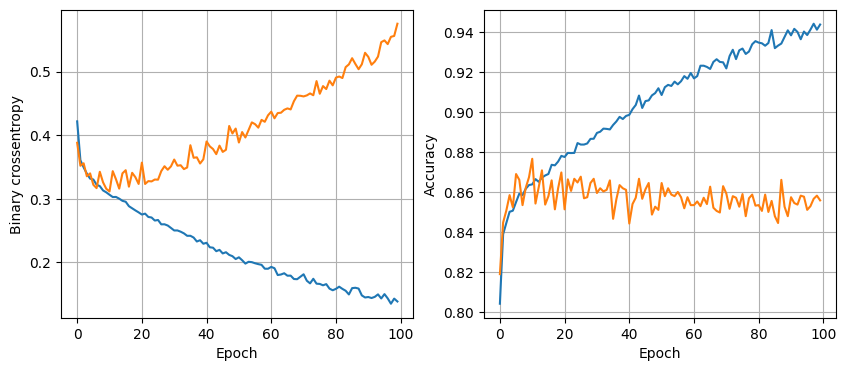

119/119 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.001, batch_size 32


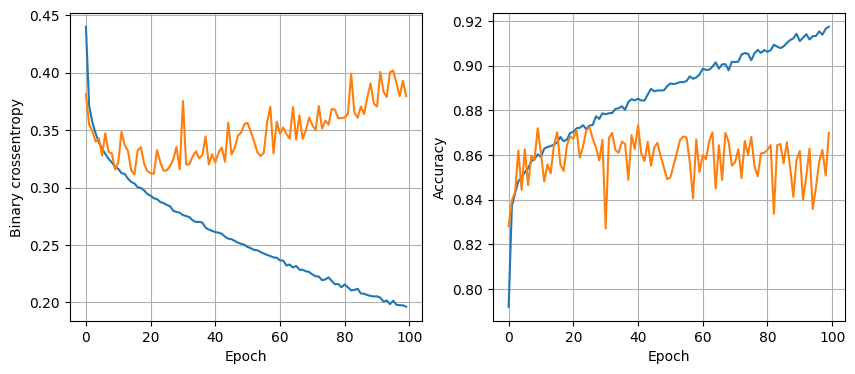

119/119 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8699
64 nodes, dropout 0, lr 0.001, batch_size 64


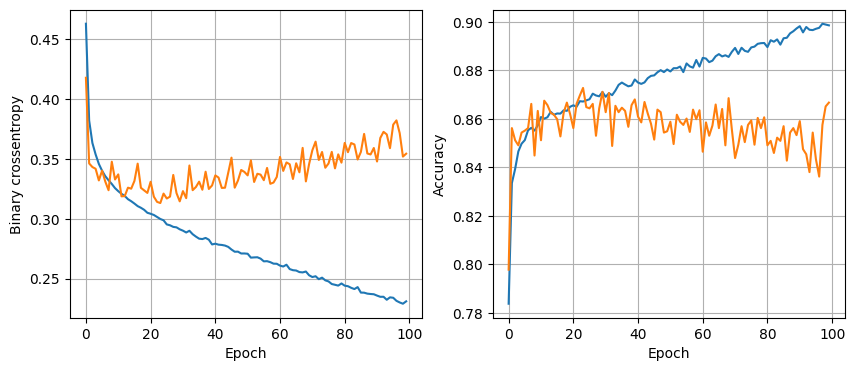

119/119 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8667
64 nodes, dropout 0, lr 0.001, batch_size 128


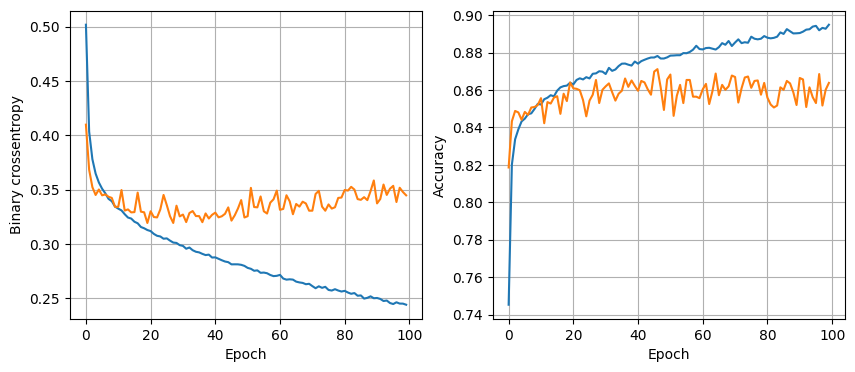

119/119 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8638
64 nodes, dropout 0.2, lr 0.01, batch_size 32


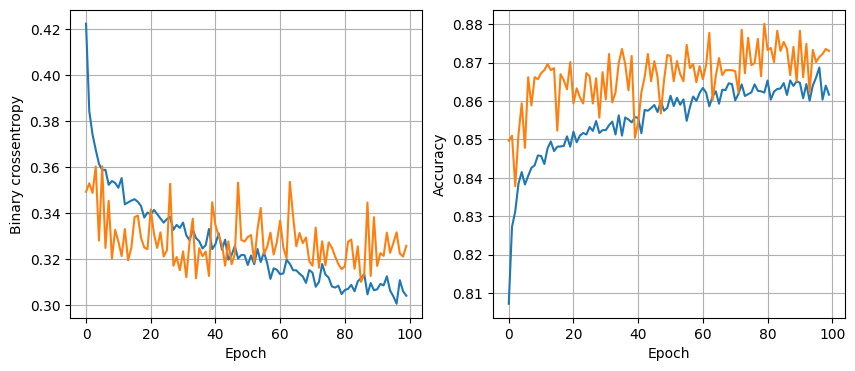

119/119 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.01, batch_size 64


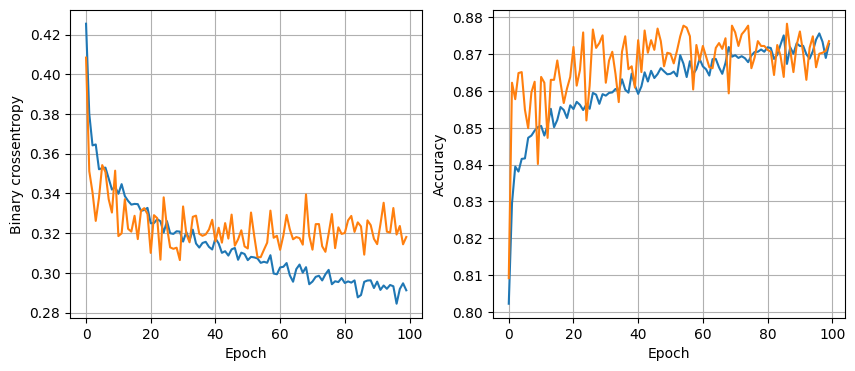

119/119 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch_size 128


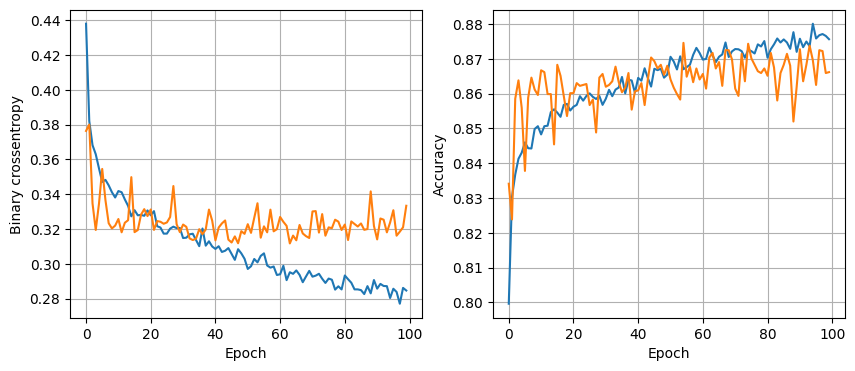

119/119 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8662
64 nodes, dropout 0.2, lr 0.005, batch_size 32


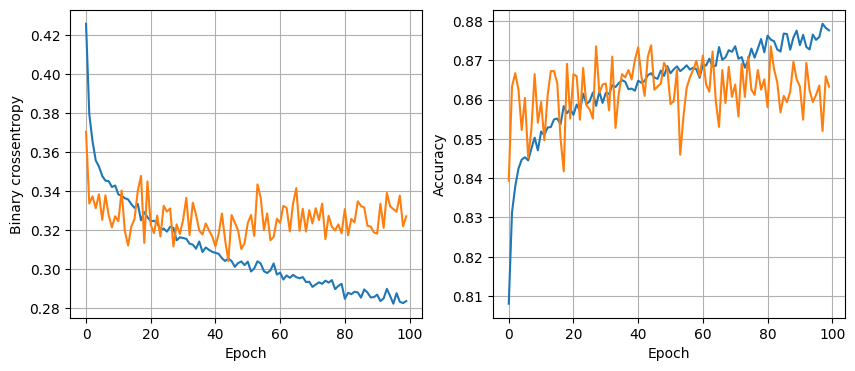

119/119 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8633
64 nodes, dropout 0.2, lr 0.005, batch_size 64


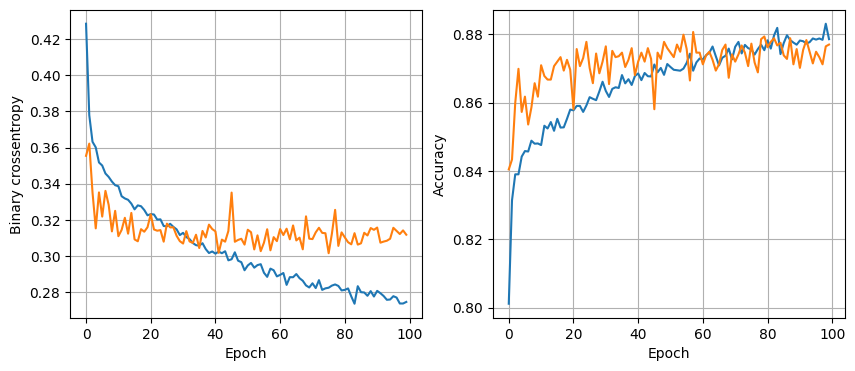

119/119 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8770
64 nodes, dropout 0.2, lr 0.005, batch_size 128


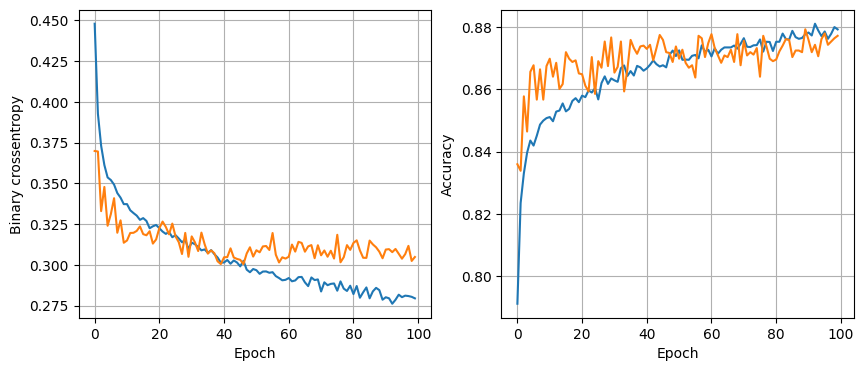

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.001, batch_size 32


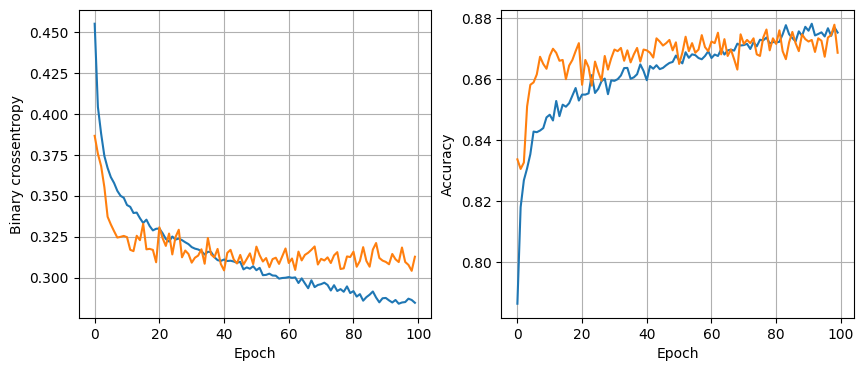

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8686
64 nodes, dropout 0.2, lr 0.001, batch_size 64


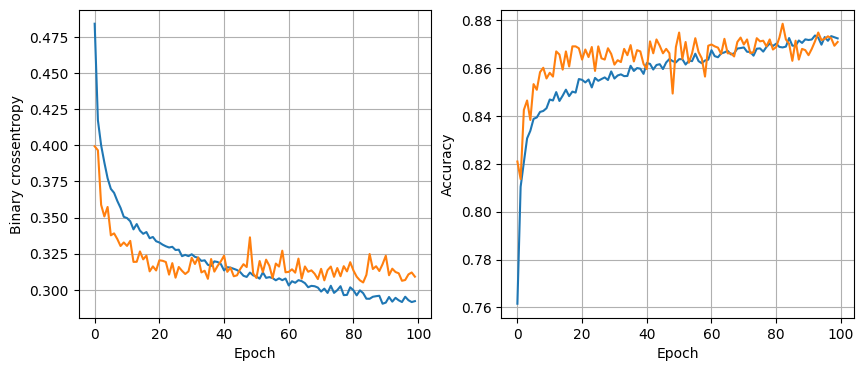

119/119 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.001, batch_size 128


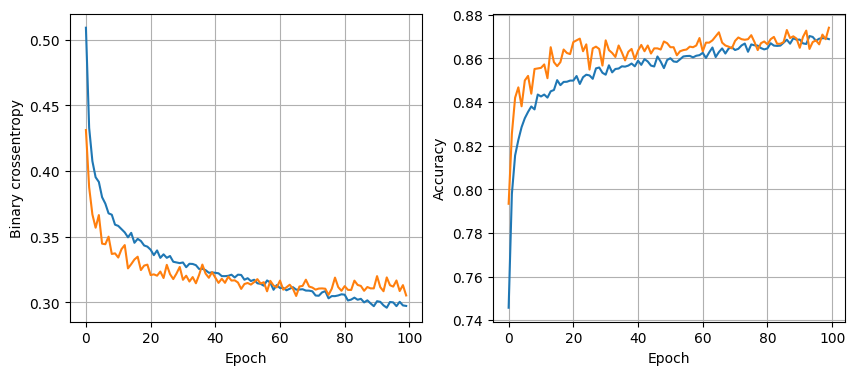

119/119 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8741


In [32]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [34]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1329
           1       0.89      0.92      0.90      2475

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

